## AI300_capstone_team03

## Project Set Up

In [56]:
# Code Implementation for Integrating MySQL with Python

# i) Installation
!pip install PyMySQL

In [57]:
# ii) Import packages
import pymysql
import pandas as pd

In [58]:
# iii) Configure database settings

# Before interacting with the MySQL database, we must connect to the server. 
# The first step is to define the configuration parameters.

DB_HOST='ai300-capstone-db.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT=3306
DB_NAME='capstone'
DB_USER='student'
DB_PWD='ZXLNo#sJI0K*uT3h&4spyDebP'
CURSORCLASS=pymysql.cursors.DictCursor

In [59]:
# iv) Establishing Connecting with the server
# With the configuration parameters defined, we can parse them into a PyMySQL connect method call, 
# which can be wrapped within a Python function. 
# The PyMySQL library is built upon two key Python objects: connection objects and cursor objects.

def initiate_remote_connection():
    try:
        connection = pymysql.connect(host=DB_HOST,
                                     port=PORT,
                                     user=DB_USER,
                                     passwd=DB_PWD,
                                     db=DB_NAME,
                                     cursorclass=CURSORCLASS)
        print('[+] Remote Connection Successful')
    except Exception as e:
        print(f'[+] Remote Connection Failed: {e}')
        connection = None

    return connection

In [60]:
# v) Executing the Connection
# Call function and return the connection object
connection = initiate_remote_connection()

[+] Remote Connection Successful


In [61]:
# vi) Retrieving Data from MySQL Database
# Define SQL query
sql_query = f'SELECT * FROM capstone.account a JOIN capstone.account_usage au ON a.account_id = au.account_id JOIN capstone.churn_status cs ON a.customer_id = cs.customer_id JOIN capstone.customer c ON a.customer_id = c.customer_id JOIN capstone.city ct ON c.zip_code = ct.zip_code;'

def get_records(sql_query):
    try:
        with connection.cursor() as cursor:
            cursor.execute(sql_query)

        # Connection is not autocommit by default, so we must commit to save changes
        connection.commit()
        
        # Fetch all the records from SQL query output
        results = cursor.fetchall()
        
        # Convert results into pandas dataframe
        df = pd.DataFrame(results)
        
        print(f'Successfully retrieved records')
        
        return df
        
    except Exception as e:
        print(f'Error encountered: {e}')

In [62]:
# To see the df that we have extracted from remote database via sql query.
df = get_records(sql_query)
df

Successfully retrieved records


account_id customer_id  tenure_months  num_referrals  \
0     BFIN-DLMOA  0013-EXCHZ              3              3   
1     AFEO-XOOCP  0014-BMAQU             63              8   
2     DEMQ-MFXWC  0016-QLJIS             65              3   
3     AIPP-VTDXJ  0019-EFAEP             72              0   
4     CJHA-SRKIB  0019-GFNTW             56              0   
...          ...         ...            ...            ...   
7038  LZXK-JBMCE  8414-OOEEL             66              0   
7039  AVGW-INZDN  9139-TWBAS             26             10   
7040  VUGJ-UXWYT  9348-ROUAI             59              5   
7041  WTKA-XYQNX  9620-QJREV             47              0   
7042  VEFD-BBOYW  9640-ZSLDC             53              3   

     has_internet_service internet_type has_unlimited_data has_phone_service  \
0                     Yes   Fiber Optic                Yes               Yes   
1                     Yes   Fiber Optic                 No               Yes   
2                     Yes         Cable                Yes               Yes   
3                     Yes   Fiber Optic                Yes               Yes   
4                     Yes           DSL                Yes                No   
...                   ...           ...                ...               ...   
7038                  Yes           DSL                Yes               Yes   
7039                  Yes         Cable                 No                No   
7040                  Yes         Cable                Yes               Yes   
7041                   No          None                 No               Yes   
7042                  Yes           DSL                Yes               Yes   

     has_multiple_lines has_premium_tech_support has_online_security  \
0                    No                      Yes                  No   
1                   Yes                      Yes                 Yes   
2                   Yes                      Yes                 Yes   
3                   Yes                       No                 Yes   
4                    No                      Yes                 Yes   
...                 ...                      ...                 ...   
7038                 No                      Yes                  No   
7039                 No                       No                 Yes   
7040                Yes                      Yes                 Yes   
7041                 No                       No                  No   
7042                 No                       No                  No   

     has_online_backup has_device_protection   contract_type  \
0                   No                    No  Month-to-Month   
1                   No                    No        Two Year   
2                  Yes                   Yes        Two Year   
3                  Yes                   Yes        Two Year   
4                  Yes                   Yes        Two Year   
...                ...                   ...             ...   
7038               Yes                   Yes        Two Year   
7039               Yes                   Yes        One Year   
7040               Yes                   Yes        Two Year   
7041                No                    No        One Year   
7042                No                   Yes        One Year   

     paperless_billing   payment_method au.account_id  \
0                  Yes      Credit Card    BFIN-DLMOA   
1                  Yes      Credit Card    AFEO-XOOCP   
2                  Yes      Credit Card    DEMQ-MFXWC   
3                  Yes  Bank Withdrawal    AIPP-VTDXJ   
4                   No  Bank Withdrawal    CJHA-SRKIB   
...                ...              ...           ...   
7038               Yes      Credit Card    LZXK-JBMCE   
7039                No  Bank Withdrawal    AVGW-INZDN   
7040                No      Credit Card    VUGJ-UXWYT   
7041                No      Credit Card    WTKA-XYQNX   
7042                No      Credit Card

In [63]:
# To see all the columns name in the combine table.
df.columns

Index(['account_id', 'customer_id', 'tenure_months', 'num_referrals',
       'has_internet_service', 'internet_type', 'has_unlimited_data',
       'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
       'has_online_security', 'has_online_backup', 'has_device_protection',
       'contract_type', 'paperless_billing', 'payment_method', 'au.account_id',
       'avg_long_distance_fee_monthly', 'total_long_distance_fee',
       'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
       'total_monthly_fee', 'total_charges_quarter', 'total_refunds',
       'cs.customer_id', 'customer_status', 'churn_label', 'churn_category',
       'churn_reason', 'c.customer_id', 'gender', 'age', 'senior_citizen',
       'married', 'num_dependents', 'zip_code', 'area_id', 'ct.zip_code',
       'city_name', 'latitude', 'longitude', 'population'],
      dtype='object')

In [64]:
# To drop duplicate columns in various combined table due to duplicate.
# Total columns to be dropped are 4 columns, as following: ["au.account_id","cs.customer_id","c.customer_id","ct.zip_code"]

df = df.drop(["account_id", "customer_id", "au.account_id","cs.customer_id","c.customer_id","ct.zip_code"], axis=1)
df

tenure_months  num_referrals has_internet_service internet_type  \
0                 3              3                  Yes   Fiber Optic   
1                63              8                  Yes   Fiber Optic   
2                65              3                  Yes         Cable   
3                72              0                  Yes   Fiber Optic   
4                56              0                  Yes           DSL   
...             ...            ...                  ...           ...   
7038             66              0                  Yes           DSL   
7039             26             10                  Yes         Cable   
7040             59              5                  Yes         Cable   
7041             47              0                   No          None   
7042             53              3                  Yes           DSL   

     has_unlimited_data has_phone_service has_multiple_lines  \
0                   Yes               Yes                 No   
1                    No               Yes                Yes   
2                   Yes               Yes                Yes   
3                   Yes               Yes                Yes   
4                   Yes                No                 No   
...                 ...               ...                ...   
7038                Yes               Yes                 No   
7039                 No                No                 No   
7040                Yes               Yes                Yes   
7041                 No               Yes                 No   
7042                Yes               Yes                 No   

     has_premium_tech_support has_online_security has_online_backup  \
0                         Yes                  No                No   
1                         Yes                 Yes                No   
2                         Yes                 Yes               Yes   
3                          No                 Yes               Yes   
4                         Yes                 Yes               Yes   
...                       ...                 ...               ...   
7038                      Yes                  No               Yes   
7039                       No                 Yes               Yes   
7040                      Yes                 Yes               Yes   
7041                       No                  No                No   
7042                       No                  No                No   

     has_device_protection   contract_type paperless_billing   payment_method  \
0                       No  Month-to-Month               Yes      Credit Card   
1                       No        Two Year               Yes      Credit Card   
2                      Yes        Two Year               Yes      Credit Card   
3                      Yes        Two Year               Yes  Bank Withdrawal   
4                      Yes        Two Year                No  Bank Withdrawal   
...                    ...             ...               ...              ...   
7038                   Yes        Two Year               Yes      Credit Card   
7039                   Yes        One Year                No  Bank Withdrawal   
7040                   Yes        Two Year                No      Credit Card   
7041                    No        One Year                No      Credit Card   
7042                   Yes        One Year                No      Credit Card   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
0                              7.38                    22.14   
1                             12.96                   816.48   
2                             28.46                  1849.90   
3                              2.25                   162.00   
4                              0.00                     0.00   
...                             ...                      ...   
7038                          12.48                   823.68   
7039                  

## Exploratory Data Analysis (EDA)

In [65]:
# This code is to know the first 5 rows of the df.
df.head()

tenure_months  num_referrals has_internet_service internet_type  \
0              3              3                  Yes   Fiber Optic   
1             63              8                  Yes   Fiber Optic   
2             65              3                  Yes         Cable   
3             72              0                  Yes   Fiber Optic   
4             56              0                  Yes           DSL   

  has_unlimited_data has_phone_service has_multiple_lines  \
0                Yes               Yes                 No   
1                 No               Yes                Yes   
2                Yes               Yes                Yes   
3                Yes               Yes                Yes   
4                Yes                No                 No   

  has_premium_tech_support has_online_security has_online_backup  \
0                      Yes                  No                No   
1                      Yes                 Yes                No   
2                      Yes                 Yes               Yes   
3                       No                 Yes               Yes   
4                      Yes                 Yes               Yes   

  has_device_protection   contract_type paperless_billing   payment_method  \
0                    No  Month-to-Month               Yes      Credit Card   
1                    No        Two Year               Yes      Credit Card   
2                   Yes        Two Year               Yes      Credit Card   
3                   Yes        Two Year               Yes  Bank Withdrawal   
4                   Yes        Two Year                No  Bank Withdrawal   

   avg_long_distance_fee_monthly  total_long_distance_fee  \
0                           7.38                    22.14   
1                          12.96                   816.48   
2                          28.46                  1849.90   
3                           2.25                   162.00   
4                           0.00                     0.00   

   avg_gb_download_monthly stream_tv stream_movie stream_music  \
0                       11       Yes           No           No   
1                        7        No           No           No   
2                       14       Yes          Yes          Yes   
3                       16       Yes           No           No   
4                       19        No           No           No   

   total_monthly_fee  total_charges_quarter  total_refunds customer_status  \
0              83.90                 267.40            0.0         Churned   
1              84.65                5377.80            0.0          Stayed   
2              90.45                5957.90            0.0          Stayed   
3             101.30                7261.25            0.0          Stayed   
4              45.05                2560.10            0.0          Stayed   

  churn_label   churn_category         churn_reason  gender  age  \
0         Yes  Dissatisfaction  Network reliability  Female   75   
1          No             None                 None    Male   52   
2          No             None                 None  Female   43   
3          No             None                 None  Female   32   
4          No             None                 None  Female   39   

  senior_citizen married  num_dependents zip_code  area_id   city_name  \
0            Yes     Yes               0    93010      607   Camarillo   
1             No     Yes               0    94558      963        Napa   
2             No     Yes               1    95681     1390    Sheridan   
3             No      No               0    91942      303     La Mesa   
4             No      No               0    93441      716  Los Olivos   

   latitude  longitude  population  
0   34.2278   -119.080       42853  
1   38.4898   -122.270       63947  
2   38.9848   -121.345        1219  
3   32.7825   -117.016       24005  
4   34.7043   -120.026        1317

In [66]:
# This code is to know the last 5 rows of the df.
df.tail()

tenure_months  num_referrals has_internet_service internet_type  \
7038             66              0                  Yes           DSL   
7039             26             10                  Yes         Cable   
7040             59              5                  Yes         Cable   
7041             47              0                   No          None   
7042             53              3                  Yes           DSL   

     has_unlimited_data has_phone_service has_multiple_lines  \
7038                Yes               Yes                 No   
7039                 No                No                 No   
7040                Yes               Yes                Yes   
7041                 No               Yes                 No   
7042                Yes               Yes                 No   

     has_premium_tech_support has_online_security has_online_backup  \
7038                      Yes                  No               Yes   
7039                       No                 Yes               Yes   
7040                      Yes                 Yes               Yes   
7041                       No                  No                No   
7042                       No                  No                No   

     has_device_protection contract_type paperless_billing   payment_method  \
7038                   Yes      Two Year               Yes      Credit Card   
7039                   Yes      One Year                No  Bank Withdrawal   
7040                   Yes      Two Year                No      Credit Card   
7041                    No      One Year                No      Credit Card   
7042                   Yes      One Year                No      Credit Card   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
7038                          12.48                   823.68   
7039                           0.00                     0.00   
7040                          47.05                  2775.95   
7041                          42.25                  1985.75   
7042                          31.99                  1695.47   

      avg_gb_download_monthly stream_tv stream_movie stream_music  \
7038                       23       Yes          Yes          Yes   
7039                       28       Yes           No           No   
7040                       24       Yes          Yes          Yes   
7041                        0        No           No           No   
7042                       59        No          Yes          Yes   

      total_monthly_fee  total_charges_quarter  total_refunds customer_status  \
7038              79.50                5196.10            0.0          Stayed   
7039              47.85                1190.50            0.0          Stayed   
7040              90.30                5194.05            0.0          Stayed   
7041              20.55                1013.05            0.0          Stayed   
7042              60.60                3297.00            0.0          Stayed   

     churn_label churn_category churn_reason  gender  age senior_citizen  \
7038          No           None         None    Male   48             No   
7039          No           None         None  Female   34             No   
7040          No           None         None  Female   50             No   
7041          No           None         None    Male   62             No   
7042          No           None         None  Female   29             No   

     married  num_dependents zip_code  area_id    city_name  latitude  \
7038      No               2    94606      999      Oakland   37.7925   
7039     Yes               0    90014       13  Los Angeles   34.0431   
7040     Yes               2    95545     1300     Honeydew   40.3429   
7041      No               0    93283      683       Weldon   35.5565   
7042     Yes               5    94938     1037    Lagunitas   38.0218   

      longitude  population  
7038   -122.244       41876  
7039   -118.252        3524  
7040   

In [67]:
# This code is to see 5 random rows of the df.
df.sample(5)

tenure_months  num_referrals has_internet_service internet_type  \
5996             57              0                  Yes           DSL   
6644              3              0                  Yes           DSL   
4569             40             10                  Yes   Fiber Optic   
1403             18              1                  Yes           DSL   
1598             71              8                  Yes   Fiber Optic   

     has_unlimited_data has_phone_service has_multiple_lines  \
5996                Yes               Yes                 No   
6644                Yes               Yes                 No   
4569                Yes               Yes                Yes   
1403                Yes               Yes                 No   
1598                Yes               Yes                Yes   

     has_premium_tech_support has_online_security has_online_backup  \
5996                      Yes                 Yes               Yes   
6644                       No                 Yes                No   
4569                      Yes                  No                No   
1403                       No                  No                No   
1598                      Yes                  No               Yes   

     has_device_protection   contract_type paperless_billing   payment_method  \
5996                   Yes        Two Year               Yes      Credit Card   
6644                    No  Month-to-Month               Yes      Credit Card   
4569                    No  Month-to-Month               Yes      Credit Card   
1403                   Yes  Month-to-Month               Yes     Mailed Check   
1598                   Yes        One Year               Yes  Bank Withdrawal   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
5996                           6.45                   367.65   
6644                          17.42                    52.26   
4569                          39.97                  1598.80   
1403                          19.05                   342.90   
1598                          27.16                  1928.36   

      avg_gb_download_monthly stream_tv stream_movie stream_music  \
5996                        3       Yes           No           No   
6644                       59        No           No           No   
4569                       17        No           No           No   
1403                       26        No           No           No   
1598                        3       Yes          Yes          Yes   

      total_monthly_fee  total_charges_quarter  total_refunds customer_status  \
5996              74.30                4166.35            0.0          Stayed   
6644              50.15                 160.85            0.0          Joined   
4569              78.85                3126.85            0.0          Stayed   
1403              49.55                 878.35            0.0         Churned   
1598             113.15                7953.25            0.0          Stayed   

     churn_label churn_category                   churn_reason  gender  age  \
5996          No           None                           None  Female   61   
6644          No           None                           None    Male   20   
4569          No           None                           None  Female   61   
1403         Yes     Competitor  Competitor had better devices    Male   53   
1598          No           None                           None    Male   50   

     senior_citizen married  num_dependents zip_code  area_id     city_name  \
5996             No      No               0    96137     1618      Westwood   
6644             No      No               0    94601      995       Oakland   
4569             No     Yes               0    92328      443  Death Valley   
1403             No     Yes               0    95950     1486        Grimes   
1598             No     Yes               0    96027     1540          Etna   

      latitude  longitude  popu

In [68]:
# This code is to know how many columns in total, non-null count and the dtype of the df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tenure_months                  7043 non-null   int64  
 1   num_referrals                  7043 non-null   int64  
 2   has_internet_service           7043 non-null   object 
 3   internet_type                  7043 non-null   object 
 4   has_unlimited_data             7043 non-null   object 
 5   has_phone_service              7043 non-null   object 
 6   has_multiple_lines             7043 non-null   object 
 7   has_premium_tech_support       7043 non-null   object 
 8   has_online_security            7043 non-null   object 
 9   has_online_backup              7043 non-null   object 
 10  has_device_protection          7043 non-null   object 
 11  contract_type                  7043 non-null   object 
 12  paperless_billing              7043 non-null   o

In [69]:
# This code is to see what is the count, mean, std, min, 25%, 50%, 75% and max of each column in df.
df.describe().T

tenure_months  num_referrals  avg_long_distance_fee_monthly  \
count    7043.000000    7043.000000                    7043.000000   
mean       32.386767       1.951867                      22.958954   
std        24.542061       3.001199                      15.448113   
min         1.000000       0.000000                       0.000000   
25%         9.000000       0.000000                       9.210000   
50%        29.000000       0.000000                      22.890000   
75%        55.000000       3.000000                      36.395000   
max        72.000000      11.000000                      49.990000   

       total_long_distance_fee  avg_gb_download_monthly  total_monthly_fee  \
count              7043.000000              7043.000000        7043.000000   
mean                749.099262                20.515405          64.761692   
std                 846.660055                20.418940          30.090047   
min                   0.000000                 0.000000          18.250000   
25%                  70.545000                 3.000000          35.500000   
50%                 401.440000                17.000000          70.350000   
75%                1191.100000                27.000000          89.850000   
max                3564.720000                85.000000         118.750000   

       total_charges_quarter  total_refunds          age  num_dependents  \
count            7043.000000    7043.000000  7043.000000     7043.000000   
mean             2280.381264       1.962182    46.509726        0.468692   
std              2266.220462       7.902614    16.750352        0.962802   
min                18.800000       0.000000    19.000000        0.000000   
25%               400.150000       0.000000    32.000000        0.000000   
50%              1394.550000       0.000000    46.000000        0.000000   
75%              3786.600000       0.000000    60.000000        0.000000   
max              8684.800000      49.790000    80.000000        9.000000   

           area_id     latitude    longitude     population  
count  7043.000000  7043.000000  7043.000000    7043.000000  
mean    767.045577    36.197454  -119.756688   22139.603294  
std     475.486842     2.468929     2.154424   21152.392837  
min       1.000000    32.555800  -124.301000      11.000000  
25%     350.000000    33.990600  -121.788000    2344.000000  
50%     741.000000    36.205500  -119.595000   17554.000000  
75%    1182.000000    38.161300  -117.970000   36125.000000  
max    1626.000000    41.962100  -114.193000  105285.000000

In [70]:
# This code is to get the key-value pairs of column "contract_type" which will be used to visualize bar chart.
contract_type_info = {}

for row in df["contract_type"]:
    
    if row in contract_type_info:
        contract_type_info[row] += 1
        
    else:
        contract_type_info[row] = 1
        
print(contract_type_info)    

{'Month-to-Month': 3610, 'Two Year': 1883, 'One Year': 1550}


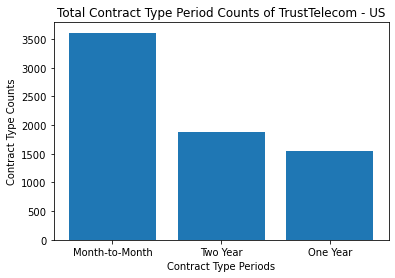

In [71]:
# We visualise the contract_type column in bar chart as per contract_type_info dictionary(key-value pairs)

import matplotlib.pyplot as plt

contract_type_periods = list(contract_type_info.keys()) 
contract_type_counts = list(contract_type_info.values())

fig, ax = plt.subplots()
ax.bar(contract_type_periods, contract_type_counts)

ax.set_xlabel("Contract Type Periods")
ax.set_ylabel("Contract Type Counts")
ax.set_title("Total Contract Type Period Counts of TrustTelecom - US")
ax.set_xticks(contract_type_periods)
ax.set_xticklabels(contract_type_periods)
plt.show()

In [72]:
# We visualise the customer_status column in term of value_counts to see the unique status.
import plotly.express as px

fig = px.bar(df["customer_status"].value_counts(), width=800, height=500)
fig.show()

In [73]:
# We visualise the churn_category column in term of value_counts to see the unique status.

fig = px.bar(df["churn_category"].value_counts(), width=800, height=500)
fig.show()

In [74]:
# We create Heatmap to see the correlation of the current df (exclude object) and before data cleaning/feature engineering.

columns = ['tenure_months', 'num_referrals', 'avg_long_distance_fee_monthly', 'total_long_distance_fee', 'avg_gb_download_monthly', 'total_monthly_fee', 'total_charges_quarter', 'total_refunds', 'age', 'num_dependents', 'area_id', 'latitude', 'longitude', 'population']
corr_df = df[columns]  # use this df for your correlation heatmap

import plotly.express as px
corr = corr_df.corr()

fig = px.imshow(corr, color_continuous_scale = 'Brwnyl')
fig.update_xaxes(side="top")
fig.show()

In [75]:
# Below is the scatter plot, taken from below df columns["tenure_months", "num_referrals", "num_dependents"]
import plotly.express as px

fig = px.scatter(df, x= "tenure_months", y= "num_referrals", 
                 color = "num_dependents",
                 labels = {"tenure_months": "Tenure Months","num_referrals": "Number of Referrrals", "num_dependents": "Number of Dependents"},
                 title = "Tenure Months vs Number of Referrrals",
                 trendline = "ols")

fig.update_xaxes(ticksuffix= " mths")
fig.update_yaxes(tickprefix= "num_ref: ")
fig.show()

In [76]:
# This code is to know the shape of the df.
df.shape

(7043, 38)

In [77]:
# This code is to change the max display of the max.rows and max.columns to 9999.
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [78]:
# This code is to check the values in column "zip_code".

df["zip_code"].value_counts()

92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
91934     2
92105     2
92250     2
93711     1
Name: zip_code, Length: 1626, dtype: int64

In [79]:
# This code is to check the values_counts in column "city_name".
df["city_name"].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
Johannesburg          2
Holtville             2
South Lake Tahoe      2
Eldridge              2
Name: city_name, Length: 1106, dtype: int64

In [80]:
# This code is to check the values_counts in column "tenure_months".
df["tenure_months"].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
10    127
8     123
9     119
70    119
12    117
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
52     80
16     80
25     79
26     79
61     76
60     76
65     76
14     76
46     74
19     73
27     72
63     72
29     72
30     72
20     71
53     70
41     70
62     70
32     69
51     68
47     68
50     68
54     68
58     67
49     66
57     65
37     65
42     65
43     65
34     65
31     65
40     64
48     64
33     64
55     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
Name: tenure_months, dtype: int64

In [81]:
# This code is to check the len of value_counts in column "tenure_months".
len(df["tenure_months"].value_counts())

72

In [82]:
# This code is to check the values_counts in column "internet_type".
df["internet_type"].value_counts()

Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: internet_type, dtype: int64

In [83]:
# This code is to check the len of value_counts in column "internet_type".
len(df["internet_type"].value_counts())

4

In [84]:
# This code is to check the values_counts in column "has_internet_service".
df["has_internet_service"].value_counts()

Yes    5517
No     1526
Name: has_internet_service, dtype: int64

In [85]:
# This code is to check the len of value_counts in column "has_internet_service".
len(df["has_internet_service"].value_counts())

2

In [86]:
# This code is to check the values_counts in column "contract_type".
df["contract_type"].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: contract_type, dtype: int64

In [87]:
# This code is to check the values_counts in column "customer_status".
df["customer_status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64

In [88]:
# This code is to check the unique value in column "customer_status".
df["customer_status"].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

In [89]:
# This code is to check the number of unique value in column "customer_status".
df["customer_status"].nunique()

3

In [90]:
df[(df["customer_status"] == "Churned") & (df["churn_label"] == "Yes")]

tenure_months  num_referrals has_internet_service internet_type  \
0                 3              3                  Yes   Fiber Optic   
22               40              0                  Yes   Fiber Optic   
25                1              0                   No          None   
28               49              1                  Yes         Cable   
30                7              0                  Yes   Fiber Optic   
...             ...            ...                  ...           ...   
7019             16              0                  Yes   Fiber Optic   
7021              8              0                  Yes   Fiber Optic   
7030             65              7                  Yes   Fiber Optic   
7031              9              0                  Yes         Cable   
7032              2              0                  Yes   Fiber Optic   

     has_unlimited_data has_phone_service has_multiple_lines  \
0                   Yes               Yes                 No   
22                  Yes               Yes                Yes   
25                   No               Yes                 No   
28                  Yes               Yes                Yes   
30                  Yes               Yes                Yes   
...                 ...               ...                ...   
7019                Yes               Yes                Yes   
7021                Yes               Yes                Yes   
7030                Yes               Yes                Yes   
7031                 No                No                 No   
7032                Yes               Yes                 No   

     has_premium_tech_support has_online_security has_online_backup  \
0                         Yes                  No                No   
22                         No                  No               Yes   
25                         No                  No                No   
28                        Yes                 Yes                No   
30                         No                  No                No   
...                       ...                 ...               ...   
7019                       No                  No                No   
7021                       No                  No                No   
7030                       No                  No               Yes   
7031                       No                  No                No   
7032                       No                  No                No   

     has_device_protection   contract_type paperless_billing   payment_method  \
0                       No  Month-to-Month               Yes      Credit Card   
22                     Yes  Month-to-Month               Yes      Credit Card   
25                      No  Month-to-Month               Yes  Bank Withdrawal   
28                     Yes        One Year                No  Bank Withdrawal   
30                      No  Month-to-Month               Yes  Bank Withdrawal   
...                    ...             ...               ...              ...   
7019                    No  Month-to-Month                No  Bank Withdrawal   
7021                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7030                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7031                    No  Month-to-Month               Yes  Bank Withdrawal   
7032                    No  Month-to-Month                No  Bank Withdrawal   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
0                              7.38                    22.14   
22                            37.69                  1507.60   
25                            31.77                    31.77   
28                            39.55                  1937.95   
30                            28.62                   200.34   
...                             ...                      ...   
7019                          46.99                   751.84   
7021                  

In [91]:
# This code is to select all columns in df with column "customer_status is "Churned".
df[df["customer_status"] == "Churned"]

tenure_months  num_referrals has_internet_service internet_type  \
0                 3              3                  Yes   Fiber Optic   
22               40              0                  Yes   Fiber Optic   
25                1              0                   No          None   
28               49              1                  Yes         Cable   
30                7              0                  Yes   Fiber Optic   
...             ...            ...                  ...           ...   
7021              8              0                  Yes   Fiber Optic   
7027              1              0                  Yes   Fiber Optic   
7030             65              7                  Yes   Fiber Optic   
7031              9              0                  Yes         Cable   
7032              2              0                  Yes   Fiber Optic   

     has_unlimited_data has_phone_service has_multiple_lines  \
0                   Yes               Yes                 No   
22                  Yes               Yes                Yes   
25                   No               Yes                 No   
28                  Yes               Yes                Yes   
30                  Yes               Yes                Yes   
...                 ...               ...                ...   
7021                Yes               Yes                Yes   
7027                Yes               Yes                Yes   
7030                Yes               Yes                Yes   
7031                 No                No                 No   
7032                Yes               Yes                 No   

     has_premium_tech_support has_online_security has_online_backup  \
0                         Yes                  No                No   
22                         No                  No               Yes   
25                         No                  No                No   
28                        Yes                 Yes                No   
30                         No                  No                No   
...                       ...                 ...               ...   
7021                       No                  No                No   
7027                       No                  No                No   
7030                       No                  No               Yes   
7031                       No                  No                No   
7032                       No                  No                No   

     has_device_protection   contract_type paperless_billing   payment_method  \
0                       No  Month-to-Month               Yes      Credit Card   
22                     Yes  Month-to-Month               Yes      Credit Card   
25                      No  Month-to-Month               Yes  Bank Withdrawal   
28                     Yes        One Year                No  Bank Withdrawal   
30                      No  Month-to-Month               Yes  Bank Withdrawal   
...                    ...             ...               ...              ...   
7021                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7027                    No  Month-to-Month               Yes  Bank Withdrawal   
7030                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7031                    No  Month-to-Month               Yes  Bank Withdrawal   
7032                    No  Month-to-Month                No  Bank Withdrawal   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
0                              7.38                    22.14   
22                            37.69                  1507.60   
25                            31.77                    31.77   
28                            39.55                  1937.95   
30                            28.62                   200.34   
...                             ...                      ...   
7021                          40.45                   323.60   
7027                  

In [92]:
# This code is to know the length of the df[df["customer_status"] == "Churned"].
len(df[df["customer_status"] == "Churned"])

1869

In [93]:
#. This code is to select all columns in df with column "customer_status is "Churned" and column "contract_type" is "Month-to-Month".
df[(df["customer_status"] == "Churned") & (df["contract_type"] == "Month-to-Month")]

tenure_months  num_referrals has_internet_service internet_type  \
0                 3              3                  Yes   Fiber Optic   
22               40              0                  Yes   Fiber Optic   
25                1              0                   No          None   
30                7              0                  Yes   Fiber Optic   
32               15              0                  Yes   Fiber Optic   
...             ...            ...                  ...           ...   
7021              8              0                  Yes   Fiber Optic   
7027              1              0                  Yes   Fiber Optic   
7030             65              7                  Yes   Fiber Optic   
7031              9              0                  Yes         Cable   
7032              2              0                  Yes   Fiber Optic   

     has_unlimited_data has_phone_service has_multiple_lines  \
0                   Yes               Yes                 No   
22                  Yes               Yes                Yes   
25                   No               Yes                 No   
30                  Yes               Yes                Yes   
32                  Yes               Yes                 No   
...                 ...               ...                ...   
7021                Yes               Yes                Yes   
7027                Yes               Yes                Yes   
7030                Yes               Yes                Yes   
7031                 No                No                 No   
7032                Yes               Yes                 No   

     has_premium_tech_support has_online_security has_online_backup  \
0                         Yes                  No                No   
22                         No                  No               Yes   
25                         No                  No                No   
30                         No                  No                No   
32                        Yes                  No                No   
...                       ...                 ...               ...   
7021                       No                  No                No   
7027                       No                  No                No   
7030                       No                  No               Yes   
7031                       No                  No                No   
7032                       No                  No                No   

     has_device_protection   contract_type paperless_billing   payment_method  \
0                       No  Month-to-Month               Yes      Credit Card   
22                     Yes  Month-to-Month               Yes      Credit Card   
25                      No  Month-to-Month               Yes  Bank Withdrawal   
30                      No  Month-to-Month               Yes  Bank Withdrawal   
32                     Yes  Month-to-Month               Yes  Bank Withdrawal   
...                    ...             ...               ...              ...   
7021                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7027                    No  Month-to-Month               Yes  Bank Withdrawal   
7030                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7031                    No  Month-to-Month               Yes  Bank Withdrawal   
7032                    No  Month-to-Month                No  Bank Withdrawal   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
0                              7.38                    22.14   
22                            37.69                  1507.60   
25                            31.77                    31.77   
30                            28.62                   200.34   
32                            45.92                   688.80   
...                             ...                      ...   
7021                          40.45                   323.60   
7027                  

In [94]:
# This code is to know the length of the below df.
len(df[(df["customer_status"] == "Churned") & (df["contract_type"] == "Month-to-Month")])

1655

In [95]:
# This code is to create churned_df for information.
churned_df = df[df["customer_status"] == "Churned"]
churned_df

tenure_months  num_referrals has_internet_service internet_type  \
0                 3              3                  Yes   Fiber Optic   
22               40              0                  Yes   Fiber Optic   
25                1              0                   No          None   
28               49              1                  Yes         Cable   
30                7              0                  Yes   Fiber Optic   
...             ...            ...                  ...           ...   
7021              8              0                  Yes   Fiber Optic   
7027              1              0                  Yes   Fiber Optic   
7030             65              7                  Yes   Fiber Optic   
7031              9              0                  Yes         Cable   
7032              2              0                  Yes   Fiber Optic   

     has_unlimited_data has_phone_service has_multiple_lines  \
0                   Yes               Yes                 No   
22                  Yes               Yes                Yes   
25                   No               Yes                 No   
28                  Yes               Yes                Yes   
30                  Yes               Yes                Yes   
...                 ...               ...                ...   
7021                Yes               Yes                Yes   
7027                Yes               Yes                Yes   
7030                Yes               Yes                Yes   
7031                 No                No                 No   
7032                Yes               Yes                 No   

     has_premium_tech_support has_online_security has_online_backup  \
0                         Yes                  No                No   
22                         No                  No               Yes   
25                         No                  No                No   
28                        Yes                 Yes                No   
30                         No                  No                No   
...                       ...                 ...               ...   
7021                       No                  No                No   
7027                       No                  No                No   
7030                       No                  No               Yes   
7031                       No                  No                No   
7032                       No                  No                No   

     has_device_protection   contract_type paperless_billing   payment_method  \
0                       No  Month-to-Month               Yes      Credit Card   
22                     Yes  Month-to-Month               Yes      Credit Card   
25                      No  Month-to-Month               Yes  Bank Withdrawal   
28                     Yes        One Year                No  Bank Withdrawal   
30                      No  Month-to-Month               Yes  Bank Withdrawal   
...                    ...             ...               ...              ...   
7021                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7027                    No  Month-to-Month               Yes  Bank Withdrawal   
7030                   Yes  Month-to-Month               Yes  Bank Withdrawal   
7031                    No  Month-to-Month               Yes  Bank Withdrawal   
7032                    No  Month-to-Month                No  Bank Withdrawal   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
0                              7.38                    22.14   
22                            37.69                  1507.60   
25                            31.77                    31.77   
28                            39.55                  1937.95   
30                            28.62                   200.34   
...                             ...                      ...   
7021                          40.45                   323.60   
7027                  

In [100]:
# This code is to select all data types except "object".
df.select_dtypes(exclude=["object"])

tenure_months  num_referrals  avg_long_distance_fee_monthly  \
0                 3              3                           7.38   
1                63              8                          12.96   
2                65              3                          28.46   
3                72              0                           2.25   
4                56              0                           0.00   
...             ...            ...                            ...   
7038             66              0                          12.48   
7039             26             10                           0.00   
7040             59              5                          47.05   
7041             47              0                          42.25   
7042             53              3                          31.99   

      total_long_distance_fee  avg_gb_download_monthly  total_monthly_fee  \
0                       22.14                       11              83.90   
1                      816.48                        7              84.65   
2                     1849.90                       14              90.45   
3                      162.00                       16             101.30   
4                        0.00                       19              45.05   
...                       ...                      ...                ...   
7038                   823.68                       23              79.50   
7039                     0.00                       28              47.85   
7040                  2775.95                       24              90.30   
7041                  1985.75                        0              20.55   
7042                  1695.47                       59              60.60   

      total_charges_quarter  total_refunds  age  num_dependents  area_id  \
0                    267.40            0.0   75               0      607   
1                   5377.80            0.0   52               0      963   
2                   5957.90            0.0   43               1     1390   
3                   7261.25            0.0   32               0      303   
4                   2560.10            0.0   39               0      716   
...                     ...            ...  ...             ...      ...   
7038                5196.10            0.0   48               2      999   
7039                1190.50            0.0   34               0       13   
7040                5194.05            0.0   50               2     1300   
7041                1013.05            0.0   62               0      683   
7042                3297.00            0.0   29               5     1037   

      latitude  longitude  population  
0      34.2278   -119.080       42853  
1      38.4898   -122.270       63947  
2      38.9848   -121.345        1219  
3      32.7825   -117.016       24005  
4      34.7043   -120.026        1317  
...        ...        ...         ...  
7038   37.7925   -122.244       41876  
7039   34.0431   -118.252        3524  
7040   40.3429   -124.063          82  
7041   35.5565   -118.245        1935  
7042   38.0218   -122.692         821  

[7043 rows x 14 columns]

In [103]:
# This code is to sum the null value of each column.
df.isnull().sum()

tenure_months                       0
num_referrals                       0
has_internet_service                0
internet_type                       0
has_unlimited_data                  0
has_phone_service                   0
has_multiple_lines                  0
has_premium_tech_support            0
has_online_security                 0
has_online_backup                   0
has_device_protection               0
contract_type                       0
paperless_billing                   0
payment_method                      0
avg_long_distance_fee_monthly       0
total_long_distance_fee             0
avg_gb_download_monthly             0
stream_tv                           0
stream_movie                        0
stream_music                        0
total_monthly_fee                   0
total_charges_quarter               0
total_refunds                       0
customer_status                     0
churn_label                        52
churn_category                   5174
churn_reason

In [104]:
# This code is to count the lenght of each column in df.
df.count()

tenure_months                    7043
num_referrals                    7043
has_internet_service             7043
internet_type                    7043
has_unlimited_data               7043
has_phone_service                7043
has_multiple_lines               7043
has_premium_tech_support         7043
has_online_security              7043
has_online_backup                7043
has_device_protection            7043
contract_type                    7043
paperless_billing                7043
payment_method                   7043
avg_long_distance_fee_monthly    7043
total_long_distance_fee          7043
avg_gb_download_monthly          7043
stream_tv                        7043
stream_movie                     7043
stream_music                     7043
total_monthly_fee                7043
total_charges_quarter            7043
total_refunds                    7043
customer_status                  7043
churn_label                      6991
churn_category                   1869
churn_reason

In [107]:
# This code is to see the correlation of each column in df.
df.select_dtypes(exclude="object").corr()

tenure_months  num_referrals  \
tenure_months                       1.000000       0.326975   
num_referrals                       0.326975       1.000000   
avg_long_distance_fee_monthly       0.014596       0.006336   
total_long_distance_fee             0.674149       0.216190   
avg_gb_download_monthly             0.049119       0.038575   
total_monthly_fee                   0.247582       0.028173   
total_charges_quarter               0.826074       0.250378   
total_refunds                       0.059021       0.024756   
age                                 0.009927      -0.025141   
num_dependents                      0.108237       0.278003   
area_id                             0.009873       0.008753   
latitude                            0.011963       0.018715   
longitude                          -0.009674      -0.009893   
population                         -0.012102      -0.007704   

                               avg_long_distance_fee_monthly  \
tenure_months                                       0.014596   
num_referrals                                       0.006336   
avg_long_distance_fee_monthly                       1.000000   
total_long_distance_fee                             0.599828   
avg_gb_download_monthly                            -0.030455   
total_monthly_fee                                   0.138396   
total_charges_quarter                               0.069500   
total_refunds                                      -0.018644   
age                                                -0.011749   
num_dependents                                     -0.007324   
area_id                                             0.004817   
latitude                                            0.002631   
longitude                                          -0.004341   
population                                         -0.018665   

                               total_long_distance_fee  \
tenure_months                                 0.674149   
num_referrals                                 0.216190   
avg_long_distance_fee_monthly                 0.599828   
total_long_distance_fee                       1.000000   
avg_gb_download_monthly                       0.011373   
total_monthly_fee                             0.246300   
total_charges_quarter                         0.610185   
total_refunds                                 0.028113   
age                                           0.003065   
num_dependents                                0.068966   
area_id                                       0.005868   
latitude                                      0.008030   
longitude                                    -0.006923   
population                                   -0.018640   

                               avg_gb_download_monthly  total_monthly_fee  \
tenure_months                                 0.049119           0.247582   
num_referrals                                 0.038575           0.028173   
avg_long_distance_fee_monthly                -0.030455           0.138396   
total_long_distance_fee                       0.011373           0.246300   
avg_gb_download_monthly                       1.000000           0.391787   
total_monthly_fee                             0.391787           1.000000   
total_charges_quarter                         0.223268           0.651236   
total_refunds                                 0.002397           0.033482   
age                                          -0.376595           0.144685   
num_dependents                                0.129966          -0.131837   
area_id                                      -0.014762          -0.013443   
latitude                                     -0.027675          -0.030325   
longitude                                     0.030981           0.028429   
population                                    0.024759           0.009597   

                               total_charges_quarter  total_refunds       age  \
tenure_months   

In [110]:
# This code is to groupby the df by column "num_referrals" with aggregate "mean()" but only for column "tenure_months".
df.groupby("num_referrals").mean()["tenure_months"]

num_referrals
0     24.232662
1     36.126151
2     44.750000
3     41.501961
4     46.046610
5     45.943182
6     43.153846
7     46.806452
8     43.779343
9     47.197479
10    46.260090
11    57.500000
Name: tenure_months, dtype: float64

In [111]:
# This code is to groupby the df by column "num_referrals" with 3 aggregates ["min", "max", "mean"].
df.select_dtypes(exclude="object").groupby("num_referrals").aggregate(["min", "max", "mean"])

tenure_months                avg_long_distance_fee_monthly  \
                        min max       mean                           min   
num_referrals                                                              
0                         1  72  24.232662                           0.0   
1                         1  72  36.126151                           0.0   
2                         1  72  44.750000                           0.0   
3                         1  72  41.501961                           0.0   
4                         1  72  46.046610                           0.0   
5                         1  72  45.943182                           0.0   
6                         1  72  43.153846                           0.0   
7                         1  72  46.806452                           0.0   
8                         1  72  43.779343                           0.0   
9                         1  72  47.197479                           0.0   
10                        1  72  46.260090                           0.0   
11                       43  72  57.500000                           0.0   

                                total_long_distance_fee                        \
                 max       mean                     min      max         mean   
num_referrals                                                                   
0              49.99  22.835519                     0.0  3515.92   554.148071   
1              49.91  23.256538                     0.0  3564.00   866.931418   
2              49.63  22.783390                     0.0  3443.04  1026.278771   
3              49.98  22.082078                     0.0  3433.68   948.917333   
4              49.95  22.884873                     0.0  3476.88  1087.557881   
5              49.91  24.206136                     0.0  3443.79  1111.461856   
6              49.96  23.497647                     0.0  3323.52  1003.047647   
7              49.94  21.607863                     0.0  3536.64  1004.622016   
8              49.33  23.595023                     0.0  3427.20   947.690563   
9              49.90  24.424244                     0.0  3564.72  1137.801261   
10             49.67  22.229013                     0.0  3487.68  1064.858565   
11             42.22  21.110000                     0.0  1815.46   907.730000   

              avg_gb_download_monthly                total_monthly_fee  \
                                  min max       mean               min   
num_referrals                                                            
0                                   0  85  19.484166             18.25   
1                                   0  85  21.801105             18.85   
2                                   0  85  20.152542             18.80   
3                                   0  76  20.258824             18.70   
4                                   0  85  24.673729             19.05   
5                                   0  85  23.106061             18.80   
6                                   0  82  22.466063             18.80   
7                                   0  85  20.471774             19.35   
8                                   0  82  21.272300             19.10   
9                                   0  85  20.567227             18.40   
10                                  0  85  22.466368             19.20   
11                                 17  25  21.000000             45.25   

                                 total_charges_quarter                        \
                  max       mean                   min      max         mean   
num_referrals                                                                  
0              118.65  62.161777                 18.85  8547.15  1647.382518   
1              118.75  71.932551                 19.00  8684.80  2746.073757   
2              116.80  66.356568                 19.70  8456.75  3196.724153   
3              116.00  65.045490                 20.05  8317.95  2

In [114]:
# This code is to see the media of the df.
df.select_dtypes(exclude="object").median()

tenure_months                       29.0000
num_referrals                        0.0000
avg_long_distance_fee_monthly       22.8900
total_long_distance_fee            401.4400
avg_gb_download_monthly             17.0000
total_monthly_fee                   70.3500
total_charges_quarter             1394.5500
total_refunds                        0.0000
age                                 46.0000
num_dependents                       0.0000
area_id                            741.0000
latitude                            36.2055
longitude                         -119.5950
population                       17554.0000
dtype: float64

## Data Preprocessing and/or Feature Engineering

In [115]:
#This code is to drop rows based on the condition df["customer_status"] == "Churned" & df["churn_label"] != "Yes" (NaN values)
# To delete nan rows based on the churn_label value "nan" or "None"

df.drop(df[(df["customer_status"] == "Churned") & (df["churn_label"] != "Yes")].index, inplace=True)


# This function is to change the value of column from "Yes" and "No" to 1 and 0. 

def change_yes_no(column):
    if column == 'Yes':
        return 1
    else:
        return 0

# Next we apply the function

df["has_internet_service"] = df["has_internet_service"].apply(change_yes_no)
df["has_unlimited_data"] = df["has_unlimited_data"].apply(change_yes_no)
df["has_phone_service"] = df["has_phone_service"].apply(change_yes_no)
df["has_multiple_lines"] = df["has_multiple_lines"].apply(change_yes_no)
df["has_premium_tech_support"] = df["has_premium_tech_support"].apply(change_yes_no)
df["has_online_security"] = df["has_online_security"].apply(change_yes_no)
df["has_online_backup"] = df["has_online_backup"].apply(change_yes_no)
df["has_device_protection"] = df["has_device_protection"].apply(change_yes_no)
df["paperless_billing"] = df["paperless_billing"].apply(change_yes_no)
df["stream_tv"] = df["stream_tv"].apply(change_yes_no)
df["stream_movie"] = df["stream_movie"].apply(change_yes_no)
df["stream_music"] = df["stream_music"].apply(change_yes_no)
df["churn_label"] = df["churn_label"].apply(change_yes_no)
df["senior_citizen"] = df["senior_citizen"].apply(change_yes_no)
df["married"] = df["married"].apply(change_yes_no)

# This function is to change "na" values data to "Unknown" in columns churn_category and churn_reason.
def change_na_in_column(column):
    if pd.isna(column):
        return "Unknown"
    else:
        return column
    
# Next we apply the function
df["churn_category"] = df["churn_category"].apply(change_na_in_column)
df["churn_reason"] = df["churn_reason"].apply(change_na_in_column)


# This function is to change tenure_months data.
def change_tenure_months(tenure_months):
    if tenure_months < 12:
        return 0
    elif tenure_months < 24:
        return 1
    elif tenure_months < 36:
        return 2
    elif tenure_months < 48:
        return 3
    elif tenure_months < 60:
        return 4
    else:
        return 5
    
# Next we apply the function
df["tenure_months"] = df["tenure_months"].apply(change_tenure_months)


# This function is to clean internet_type data.
def change_internet_type(internet_type):
    if internet_type == "Cable":
        return 1
    elif internet_type == "DSL":
        return 2
    elif internet_type == "Fiber Optic":
        return 3
    else:
        return 0
    
# Next we apply the function
df["internet_type"] = df["internet_type"].apply(change_internet_type)


# This function is to clean contract_type data.
def change_contract_type(contract_type):
    if contract_type == "Month-to-Month":
        return 0
    elif contract_type == "One Year":
        return 1
    else:
        return 2
    
# Next we apply the function
df["contract_type"] = df["contract_type"].apply(change_contract_type)


# This function is to clean payment_method data.
def change_payment_method(payment_method):
    if payment_method == "Bank Withdrawal":
        return 1
    elif payment_method == "Credit Card":
        return 2
    else:
        return 0
    
# Next we apply the function
df["payment_method"] = df["payment_method"].apply(change_payment_method)


# This function is to clean customer_status data.
def change_customer_status(customer_status):
    if customer_status == "Stayed":
        return 1
    elif customer_status == "Churned":
        return 2
    else:
        return 0
    
# Next we apply the function
df["customer_status"] = df["customer_status"].apply(change_customer_status)


# This function is to clean churn_category data.
def change_churn_category(churn_category):
    if churn_category == "Unknown":
        return 0
    elif churn_category == "Competitor":
        return 1
    elif churn_category == "Attitude":
        return 2
    elif churn_category == "Dissatisfaction":
        return 3
    elif churn_category == "Price":
        return 4
    else:
        return 5
    
# Next we apply the function
df["churn_category"] = df["churn_category"].apply(change_churn_category)


# This function is to clean churn_reason data.
def change_churn_reason(churn_reason):
    if churn_reason == "Unknown":
        return 0
    elif churn_reason == "Competitor had better devices":
        return 1
    elif churn_reason == "Competitor made better offer":
        return 2
    elif churn_reason == "Attitude of support person":
        return 3
    elif churn_reason == "Don't know":
        return 4
    elif churn_reason == "Competitor offered more data":
        return 5
    elif churn_reason == "Competitor offered higher download speeds":
        return 6
    elif churn_reason == "Attitude of service provider":
        return 7
    elif churn_reason == "Price too high":
        return 8
    elif churn_reason == "Product dissatisfaction":
        return 9
    elif churn_reason == "Network reliability":
        return 10
    elif churn_reason == "Long distance charges":
        return 11
    else:
        return 12
    
# Next we apply the function
df["churn_reason"] = df["churn_reason"].apply(change_churn_reason)


# This function is to clean gender data.
def change_gender(gender):
    if gender == "Male":
        return 1
    else:
        return 0
    
# Next we apply the function
df["gender"] = df["gender"].apply(change_gender)


# This function is to change age data.
def change_age(age):
    if age < 25:
        return 1
    elif age < 35:
        return 2
    elif age < 45:
        return 3
    elif age < 55:
        return 4
    elif age < 65:
        return 5
    elif age < 75:
        return 5
    else:
        return 0
    
# Next we apply the function
df["age"] = df["age"].apply(change_age)

df

tenure_months  num_referrals  has_internet_service  internet_type  \
0                 0              3                     1              3   
1                 5              8                     1              3   
2                 5              3                     1              1   
3                 5              0                     1              3   
4                 4              0                     1              2   
...             ...            ...                   ...            ...   
7038              5              0                     1              2   
7039              2             10                     1              1   
7040              4              5                     1              1   
7041              3              0                     0              0   
7042              4              3                     1              2   

      has_unlimited_data  has_phone_service  has_multiple_lines  \
0                      1                  1                   0   
1                      0                  1                   1   
2                      1                  1                   1   
3                      1                  1                   1   
4                      1                  0                   0   
...                  ...                ...                 ...   
7038                   1                  1                   0   
7039                   0                  0                   0   
7040                   1                  1                   1   
7041                   0                  1                   0   
7042                   1                  1                   0   

      has_premium_tech_support  has_online_security  has_online_backup  \
0                            1                    0                  0   
1                            1                    1                  0   
2                            1                    1                  1   
3                            0                    1                  1   
4                            1                    1                  1   
...                        ...                  ...                ...   
7038                         1                    0                  1   
7039                         0                    1                  1   
7040                         1                    1                  1   
7041                         0                    0                  0   
7042                         0                    0                  0   

      has_device_protection  contract_type  paperless_billing  payment_method  \
0                         0              0                  1               2   
1                         0              2                  1               2   
2                         1              2                  1               2   
3                         1              2                  1               1   
4                         1              2                  0               1   
...                     ...            ...                ...             ...   
7038                      1              2                  1               2   
7039                      1              1                  0               1   
7040                      1              2                  0               2   
7041                      0              1                  0               2   
7042                      1              1                  0               2   

      avg_long_distance_fee_monthly  total_long_distance_fee  \
0                              7.38                    22.14   
1                             12.96                   816.48   
2                             28.46                  1849.90   
3                              2.25                   162.00   
4                              0.00                     0.00   
...                             ...                   

In [116]:
df.corr()["churn_label"]

tenure_months                   -0.339543
num_referrals                   -0.284537
has_internet_service             0.225840
internet_type                    0.275389
has_unlimited_data               0.164129
has_phone_service                0.011259
has_multiple_lines               0.041614
has_premium_tech_support        -0.164739
has_online_security             -0.170356
has_online_backup               -0.081910
has_device_protection           -0.063559
contract_type                   -0.432452
paperless_billing                0.193445
payment_method                  -0.203583
avg_long_distance_fee_monthly    0.007801
total_long_distance_fee         -0.221511
avg_gb_download_monthly          0.050936
stream_tv                        0.060676
stream_movie                     0.060373
stream_music                     0.044917
total_monthly_fee                0.191064
total_charges_quarter           -0.196650
total_refunds                   -0.030964
customer_status                  0

In [117]:
## identify outliers - def function to identify outliers - z-score

import numpy as np
import pandas as pd

outliers=[]

def detect_outlier(data_1):
    
    threshold=3 ## sigma
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
        
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(df["total_long_distance_fee"])
outlier_datapoints_sorted = sorted(outlier_datapoints, reverse=True)
print(outlier_datapoints_sorted)

[3564.72, 3564.0, 3536.64, 3515.92, 3508.82, 3501.72, 3493.44, 3492.72, 3487.68, 3482.64, 3481.92, 3476.9, 3476.88, 3461.96, 3458.88, 3449.89, 3443.79, 3443.76, 3443.04, 3433.68, 3431.52, 3430.72, 3427.2, 3413.68, 3412.8, 3408.71, 3408.6, 3405.15, 3401.28, 3399.9, 3398.06, 3392.04, 3390.8, 3385.44, 3372.72, 3367.2, 3366.68, 3361.14, 3360.56, 3360.0, 3357.36, 3345.98, 3340.4, 3338.42, 3337.53, 3332.58, 3328.56, 3324.22, 3323.52, 3319.76, 3319.2, 3319.2, 3308.9, 3306.96, 3303.63]


In [118]:
## identify outliers - describe() to find mean()

df["total_long_distance_fee"].describe().T

count    6991.000000
mean      751.636019
std       848.065770
min         0.000000
25%        70.850000
50%       407.690000
75%      1194.310000
max      3564.720000
Name: total_long_distance_fee, dtype: float64

In [119]:
# "total_long_distance_fee": replace outliers [3564.72, 3564.0, 3536.64, 3515.92, 3508.82, 3501.72, 3493.44, 3492.72, 3487.68, 3482.64, 3481.92, 3476.9, 3476.88, 3461.96, 3458.88, 3449.89, 3443.79, 3443.76, 3443.04, 3433.68, 3431.52, 3430.72, 3427.2, 3413.68, 3412.8, 3408.71, 3408.6, 3405.15, 3401.28, 3399.9, 3398.06, 3392.04, 3390.8, 3385.44, 3372.72, 3367.2, 3366.68, 3361.14, 3360.56, 3360.0, 3357.36, 3345.98, 3340.4, 3338.42, 3337.53, 3332.58, 3328.56, 3324.22, 3323.52, 3319.76, 3319.2, 3319.2, 3308.9, 3306.96, 3303.63, 3294.0, 3291.88, 3290.1] with mean 749.099262

df["total_long_distance_fee"] = df["total_long_distance_fee"].replace([3564.72, 3564.0, 3536.64, 3515.92, 3508.82, 3501.72, 3493.44, 3492.72, 3487.68, 3482.64, 3481.92, 3476.9, 3476.88, 3461.96, 3458.88, 3449.89, 3443.79, 3443.76, 3443.04, 3433.68, 3431.52, 3430.72, 3427.2, 3413.68, 3412.8, 3408.71, 3408.6, 3405.15, 3401.28, 3399.9, 3398.06, 3392.04, 3390.8, 3385.44, 3372.72, 3367.2, 3366.68, 3361.14, 3360.56, 3360.0, 3357.36, 3345.98, 3340.4, 3338.42, 3337.53, 3332.58, 3328.56, 3324.22, 3323.52, 3319.76, 3319.2, 3319.2, 3308.9, 3306.96, 3303.63, 3294.0, 3291.88, 3290.1],df["total_long_distance_fee"].mean())

In [120]:
## identify outliers - def function to identify outliers - z-score

import numpy as np
import pandas as pd

outliers=[]

def detect_outlier(data_1):
    
    threshold=3 ## sigma
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
        
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(df["avg_gb_download_monthly"])
outlier_datapoints_sorted = sorted(outlier_datapoints, reverse=True)
print(outlier_datapoints_sorted)

[85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]


In [121]:
## identify outliers - describe() to find mean()

df["avg_gb_download_monthly"].describe().T

count    6991.000000
mean       20.532542
std        20.435951
min         0.000000
25%         3.000000
50%        17.000000
75%        27.000000
max        85.000000
Name: avg_gb_download_monthly, dtype: float64

In [122]:
# "avg_gb_download_monthly": replace outliers [85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82] with mean 20.515405

df["avg_gb_download_monthly"] = df["avg_gb_download_monthly"].replace([85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82],df["avg_gb_download_monthly"].mean())

In [123]:
df.describe().T

count          mean           std       min  \
tenure_months                  6991.0      2.243027      1.933297    0.0000   
num_referrals                  6991.0      1.961522      3.008016    0.0000   
has_internet_service           6991.0      0.782148      0.412815    0.0000   
internet_type                  6991.0      1.875554      1.184529    0.0000   
has_unlimited_data             6991.0      0.672436      0.469358    0.0000   
has_phone_service              6991.0      0.903018      0.295954    0.0000   
has_multiple_lines             6991.0      0.422114      0.493932    0.0000   
has_premium_tech_support       6991.0      0.290802      0.454165    0.0000   
has_online_security            6991.0      0.287513      0.452635    0.0000   
has_online_backup              6991.0      0.345301      0.475500    0.0000   
has_device_protection          6991.0      0.344872      0.475361    0.0000   
contract_type                  6991.0      0.759119      0.849502    0.0000   
paperless_billing              6991.0      0.591904      0.491516    0.0000   
payment_method                 6991.0      1.337863      0.576602    0.0000   
avg_long_distance_fee_monthly  6991.0     22.954998     15.451233    0.0000   
total_long_distance_fee        6991.0    729.636232    812.614376    0.0000   
avg_gb_download_monthly        6991.0     19.721060     19.125433    0.0000   
stream_tv                      6991.0      0.383350      0.486237    0.0000   
stream_movie                   6991.0      0.387355      0.487181    0.0000   
stream_music                   6991.0      0.352882      0.477901    0.0000   
total_monthly_fee              6991.0     64.675704     30.124200   18.2500   
total_charges_quarter          6991.0   2286.403682   2268.905318   18.8000   
total_refunds                  6991.0      1.976777      7.930135    0.0000   
customer_status                6991.0      1.194965      0.535608    0.0000   
churn_label                    6991.0      0.259906      0.438614    0.0000   
churn_category                 6991.0      0.566729      1.175247    0.0000   
churn_reason                   6991.0      1.371907      3.036899    0.0000   
gender                         6991.0      0.504649      0.500014    0.0000   
age                            6991.0      3.170362      1.562164    0.0000   
senior_citizen                 6991.0      0.161922      0.368406    0.0000   
married                        6991.0      0.483908      0.499777    0.0000   
num_dependents                 6991.0      0.470748      0.964593    0.0000   
area_id                        6991.0    766.770133    475.670236    1.0000   
latitude                       6991.0     36.196639      2.470466   32.5558   
longitude                      6991.0   -119.754294      2.155229 -124.3010   
population                     6991.0  22158.447146  21162.289738   11.0000   

                                     25%         50%          75%          max  
tenure_months                     0.0000      2.0000      4.00000       5.0000  
num_referrals                     0.0000      0.0000      3.00000      11.0000  
has_internet_service              1.0000      1.0000      1.00000       1.0000  
internet_type                     1.0000      2.0000      3.00000       3.0000  
has_unlimited_data                0.0000      1.0000      1.00000       1.0000  
has_phone_service                 1.0000      1.0000      1.00000       1.0000  
has_multiple_lines                0.0000      0.0000      1.00000       1.0000  
has_premium_tech_support          0.0000      0.0000      1.00000       1.0000  
has_online_security               0.0000      0.0000      1.00000       1.0000  
has_online_backup                 0.0000      0.0000      1.00000       1.0000  
has_device_protection             0.0000      0.0000      1.00000       1.0000  
contract_type                     0.0000      0.0000      2.00000       2.0000  
paperless_billing                 0.0000      1.0000   

In [124]:
# This code is to see the correlation of each colummns in df.
df.corr()

tenure_months  num_referrals  \
tenure_months                       1.000000       0.316495   
num_referrals                       0.316495       1.000000   
has_internet_service                0.039459      -0.037973   
internet_type                       0.041258      -0.050609   
has_unlimited_data                  0.035715      -0.004369   
has_phone_service                   0.006444       0.010913   
has_multiple_lines                  0.325973       0.077950   
has_premium_tech_support            0.314939       0.107780   
has_online_security                 0.318552       0.141885   
has_online_backup                   0.355183       0.112412   
has_device_protection               0.352288       0.115736   
contract_type                       0.631035       0.289122   
paperless_billing                   0.006828      -0.044199   
payment_method                      0.090345       0.072823   
avg_long_distance_fee_monthly       0.016027       0.007246   
total_long_distance_fee             0.657639       0.209723   
avg_gb_download_monthly             0.048204       0.034081   
stream_tv                           0.274497       0.080707   
stream_movie                        0.282501       0.058300   
stream_music                        0.236203       0.052240   
total_monthly_fee                   0.243625       0.029507   
total_charges_quarter               0.815046       0.249692   
total_refunds                       0.057757       0.023997   
customer_status                    -0.137363      -0.192205   
churn_label                        -0.339543      -0.284537   
churn_category                     -0.269920      -0.230974   
churn_reason                       -0.250071      -0.213001   
gender                              0.003345      -0.008965   
age                                 0.007369      -0.015776   
senior_citizen                      0.015043      -0.027038   
married                             0.367470       0.673483   
num_dependents                      0.103657       0.277771   
area_id                             0.013251       0.008771   
latitude                            0.014538       0.018657   
longitude                          -0.011854      -0.009724   
population                         -0.013561      -0.008700   

                               has_internet_service  internet_type  \
tenure_months                              0.039459       0.041258   
num_referrals                             -0.037973      -0.050609   
has_internet_service                       1.000000       0.835701   
internet_type                              0.835701       1.000000   
has_unlimited_data                         0.756159       0.632496   
has_phone_service                         -0.172955       0.058612   
has_multiple_lines                         0.211804       0.325756   
has_premium_tech_support                   0.337949       0.187744   
has_online_security                        0.335255       0.184413   
has_online_backup                          0.383278       0.318107   
has_device_protection                      0.382914       0.322171   
contract_type                             -0.201469      -0.220020   
paperless_billing                          0.321841       0.361197   
payment_method                            -0.163739      -0.180148   
avg_long_distance_fee_monthly             -0.067773       0.039877   
total_long_distance_fee                   -0.012075       0.057314   
avg_gb_download_monthly                    0.544234       0.426424   
stream_tv                                  0.416116       0.417915   
stream_movie                               0.419649       0.419705   
stream_music                               0.389726       0.361897   
total_monthly_fee                          0.763869       0.871044   
total_charges_quarter                      0.377319       0.425643   
total_refunds                              0.021270       0.028166   
customer_status    

In [125]:
# This code is to see the correlation of each colummns in df with column "churn_label"
df.corr()["churn_label"]

tenure_months                   -0.339543
num_referrals                   -0.284537
has_internet_service             0.225840
internet_type                    0.275389
has_unlimited_data               0.164129
has_phone_service                0.011259
has_multiple_lines               0.041614
has_premium_tech_support        -0.164739
has_online_security             -0.170356
has_online_backup               -0.081910
has_device_protection           -0.063559
contract_type                   -0.432452
paperless_billing                0.193445
payment_method                  -0.203583
avg_long_distance_fee_monthly    0.007801
total_long_distance_fee         -0.220405
avg_gb_download_monthly          0.057992
stream_tv                        0.060676
stream_movie                     0.060373
stream_music                     0.044917
total_monthly_fee                0.191064
total_charges_quarter           -0.196650
total_refunds                   -0.030964
customer_status                  0

In [126]:
# This code is to filter the correlation with all columns with column "customer_status" that has value more than 0.1.
df.corr()["churn_label"][df.corr()["churn_label"] > 0.05]

has_internet_service       0.225840
internet_type              0.275389
has_unlimited_data         0.164129
paperless_billing          0.193445
avg_gb_download_monthly    0.057992
stream_tv                  0.060676
stream_movie               0.060373
total_monthly_fee          0.191064
customer_status            0.890765
churn_label                1.000000
churn_category             0.813791
churn_reason               0.762362
senior_citizen             0.152091
population                 0.053861
Name: churn_label, dtype: float64

In [127]:
df.corr()["churn_label"][df.corr()["churn_label"] < -0.05]

tenure_months              -0.339543
num_referrals              -0.284537
has_premium_tech_support   -0.164739
has_online_security        -0.170356
has_online_backup          -0.081910
has_device_protection      -0.063559
contract_type              -0.432452
payment_method             -0.203583
total_long_distance_fee    -0.220405
total_charges_quarter      -0.196650
married                    -0.149621
num_dependents             -0.217880
Name: churn_label, dtype: float64

In [128]:
# We create Heatmap to see after data preprocessing and/or feature engineering.

columns = ['has_internet_service', 'internet_type', 'has_unlimited_data',
       'paperless_billing', 'total_monthly_fee', 'customer_status',
       'churn_label', 'churn_category', 'churn_reason', 'senior_citizen']

corr_df = df[columns]  # use this df for your correlation heatmap

import plotly.express as px
corr = corr_df.corr()

fig = px.imshow(corr, color_continuous_scale = 'Brwnyl')
fig.update_xaxes(side="top")
fig.show()

In [129]:
# We create Scatterplot Matrix Chart to see after data preprocessing and/or feature engineering.

sm_columns = ['customer_status', 'churn_label', 'churn_category', 'churn_reason']

fig = px.scatter_matrix(df, dimensions=sm_columns, 
                        color="senior_citizen")
fig.show()

In [130]:
# We visualise the bar chart with regard to churn_label and customer_status of the df.
import plotly.express as px

fig = px.bar(df, x="churn_label", y="customer_status", 
             color= "churn_category",
             title= "TrustTelecom - US Churn Label based on the Customer Status",
             category_orders={"churn_label": df})
fig.show()

## Models Building and Comparing Model Performance

We will import all the libraries needed for the AI300_capstone_project.

In [131]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [133]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import binarize
import statistics
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Here we start with the models building.

<b>Selecting the feature columns</b><br>
We select the features we want to use in predicting our outcome.

<b> Import the models of your choice</b><br>
You are highly encouraged to try other models after this section.

<b> Train-Test Split</b></br>
We split the data to facilitate the evaluation of the model.

<b> Evaluate your model</b><br>
We generate a logistic regression model by fitting the training data using <code>.fit()</code>, and thereafter generate predictions using <code>.predict_proba()</code>

<b>We evalute the model's AUC score using <code>metrics.roc_auc_score()</code></b>

In [134]:
features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

In [135]:
# 1a. Logistic Regression Model - Train Test Split

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

logreg_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg_model = logreg_model.fit(X_train, y_train)
y_pred_proba = logreg_model.predict_proba(X_test)[:,1]

print('AUC:', metrics.roc_auc_score(y_test, y_pred_proba))

AUC: 0.8949008145484459


In [136]:
# 1b. Logistic Regression Model - KFold Cross Validation

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

kf = KFold(n_splits=4, shuffle=True, random_state=0)

logreg_model = LogisticRegression(random_state=0)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
    logreg_model = logreg_model.fit(X_train, y_train)
    y_pred_proba = logreg_model.predict_proba(X_test)[:,1]

print('AUC:', metrics.roc_auc_score(y_test, y_pred_proba)) 

AUC: 0.8876716572018586


In [137]:
# Hyperparameter Tuning for XGBoost Model
# For your awareness, it will take a long time to get the result when you run this code.

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']


X = df[features]
y = df['churn_label']

xgb_model = xgb.XGBClassifier()
param_grid = {"learning_rate": [0.1, 0.4, 0.7],
              "subsample": [0.6, 0.8, 0.9],
              "max_depth": [4, 14, 18],
              "random_state": [0, 17, 42],
              "scale_pos_weight": [10, 30, 50],
              "gamma": [1, 4, 8]
}

xggrid_search = GridSearchCV(xgb_model, param_grid, cv=4)
xggrid_search.fit(X, y, verbose=False)

print("Best Parameters:", xggrid_search.best_params_)

Best Parameters: {'gamma': 1, 'learning_rate': 0.4, 'max_depth': 18, 'random_state': 17, 'scale_pos_weight': 10, 'subsample': 0.6}


In [138]:
# 2a. XGBoost Model - Train Test Split

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

xgb_model = xgb.XGBClassifier(**xggrid_search.best_params_, min_child_weight=22, reg_alpha=0.5) #it's same result whether we use **xggrid_search.best_params or the value in Best Parameters: {'gamma': 1, 'learning_rate': 0.4, 'max_depth': 18, 'random_state': 17, 'scale_pos_weight': 10, 'subsample': 0.6} 

xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_test)
y_predict_proba = xgb_model.predict_proba(X_test)[:,1]

print('AUC:', metrics.roc_auc_score(y_test, y_predict_proba))
print('Accuracy:', metrics.accuracy_score(y_test, y_predict))
print("Precision Score:", metrics.precision_score(y_test, y_predict))
print("Recall Score:", metrics.recall_score(y_test, y_predict))
print("F1 Score:", metrics.f1_score(y_test, y_predict))

AUC: 0.8980932593615416
Accuracy: 0.7492850333651097
Precision Score: 0.5127161749745677
Recall Score: 0.9147005444646098
F1 Score: 0.6571056062581486


In [139]:
# 2b. XGBoost Model - KFold Cross Validation

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

kf = KFold(n_splits=4, shuffle=True, random_state=0)

xgb_model = xgb.XGBClassifier(learning_rate=0.4, subsample=0.6, max_depth=18, random_state=17, scale_pos_weight=10,
                             gamma=1, min_child_weight=22, reg_alpha=0.5)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_predict = xgb_model.predict(X_test)
    y_predict_proba = xgb_model.predict_proba(X_test)[:,1]

print('AUC:', metrics.roc_auc_score(y_test, y_predict_proba))
print('Accuracy:', metrics.accuracy_score(y_test, y_predict))
print("Precision Score:", metrics.precision_score(y_test, y_predict))
print("Recall Score:", metrics.recall_score(y_test, y_predict))
print("F1 Score:", metrics.f1_score(y_test, y_predict))

AUC: 0.8935518843572535
Accuracy: 0.7481396680022896
Precision Score: 0.5043156596794082
Recall Score: 0.9149888143176734
F1 Score: 0.6502384737678857


In [140]:
# Hyperparameter Tuning for CatBoost Model

# For your awareness, it will take a long time to get the result when you run this code.

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']


X = df[features]
y = df['churn_label']

model = CatBoostClassifier()
param_grid = {"learning_rate": [0.1, 0.3],
              "subsample": [0.5, 0.7],
              "max_depth": [7, 12],
              "random_seed": [0, 17]}

grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X, y, verbose=False)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'random_seed': 17, 'subsample': 0.5}


In [141]:
# 3a. CatBoost Model - Train Test Split

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

catb_model = CatBoostClassifier(learning_rate=0.1, max_depth=7, random_seed=17, subsample=0.5,  
                                scale_pos_weight=30, l2_leaf_reg=12, random_strength=10)
catb_model.fit(X_train, y_train, verbose=False)
y_predict = catb_model.predict(X_test)
y_predict_proba = catb_model.predict_proba(X_test)[:,1]

print('AUC:', metrics.roc_auc_score(y_test, y_predict_proba))
print('Accuracy:', metrics.accuracy_score(y_test, y_predict))
print("Precision Score:", metrics.precision_score(y_test, y_predict))
print("Recall Score:", metrics.recall_score(y_test, y_predict))
print("F1 Score:", metrics.f1_score(y_test, y_predict))

AUC: 0.902867443221879
Accuracy: 0.7535748331744518
Precision Score: 0.5172764227642277
Recall Score: 0.9237749546279492
F1 Score: 0.6631921824104235


In [142]:
# 3b. CatBoost Model - KFold Cross Validation

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

kf = KFold(n_splits=7, shuffle=True, random_state=0)

catb_model = CatBoostClassifier(**grid_search.best_params_, scale_pos_weight=30, l2_leaf_reg=12, random_strength=10)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    catb_model.fit(X_train, y_train, verbose=False)
    y_predict = catb_model.predict(X_test)
    y_predict_proba = catb_model.predict_proba(X_test)[:,1]

print('AUC:', metrics.roc_auc_score(y_test, y_predict_proba))
print('Accuracy:', metrics.accuracy_score(y_test, y_predict))
print("Precision Score:", metrics.precision_score(y_test, y_predict))
print("Recall Score:", metrics.recall_score(y_test, y_predict))
print("F1 Score:", metrics.f1_score(y_test, y_predict))

AUC: 0.8921677937271821
Accuracy: 0.7565130260521042
Precision Score: 0.5213483146067416
Recall Score: 0.8854961832061069
F1 Score: 0.6562942008486563


## Final Selected Model 

In [143]:
# 3a. CatBoost Model - Train Test Split

features = ['has_internet_service', 'internet_type', 'has_unlimited_data', 'paperless_billing', 'stream_tv',
            'stream_movie', 'senior_citizen', 'tenure_months', 'num_referrals', 'has_premium_tech_support',
            'has_online_security', 'has_online_backup', 'has_device_protection', 'contract_type', 
            'payment_method', 'married', 'num_dependents']

X = df[features]
y = df['churn_label']

model = CatBoostClassifier(learning_rate=0.1, max_depth=7, random_seed=17, subsample=0.5,  
                                scale_pos_weight=30, l2_leaf_reg=12, random_strength=10)
model = model.fit(X, y, verbose=False)
model